<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_Nlplab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Prediction using LSTM**

LSTM is a type of recurrent neural network architecture designed for handling sequences of data, making it well suited for times series analysis.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
df = pd.read_csv('/content/testset.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
df.shape

(100990, 20)

# **Data Preprocessing**

Visualizing the Distribution of Temperature

In [ ]:
print(df.columns)


Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')


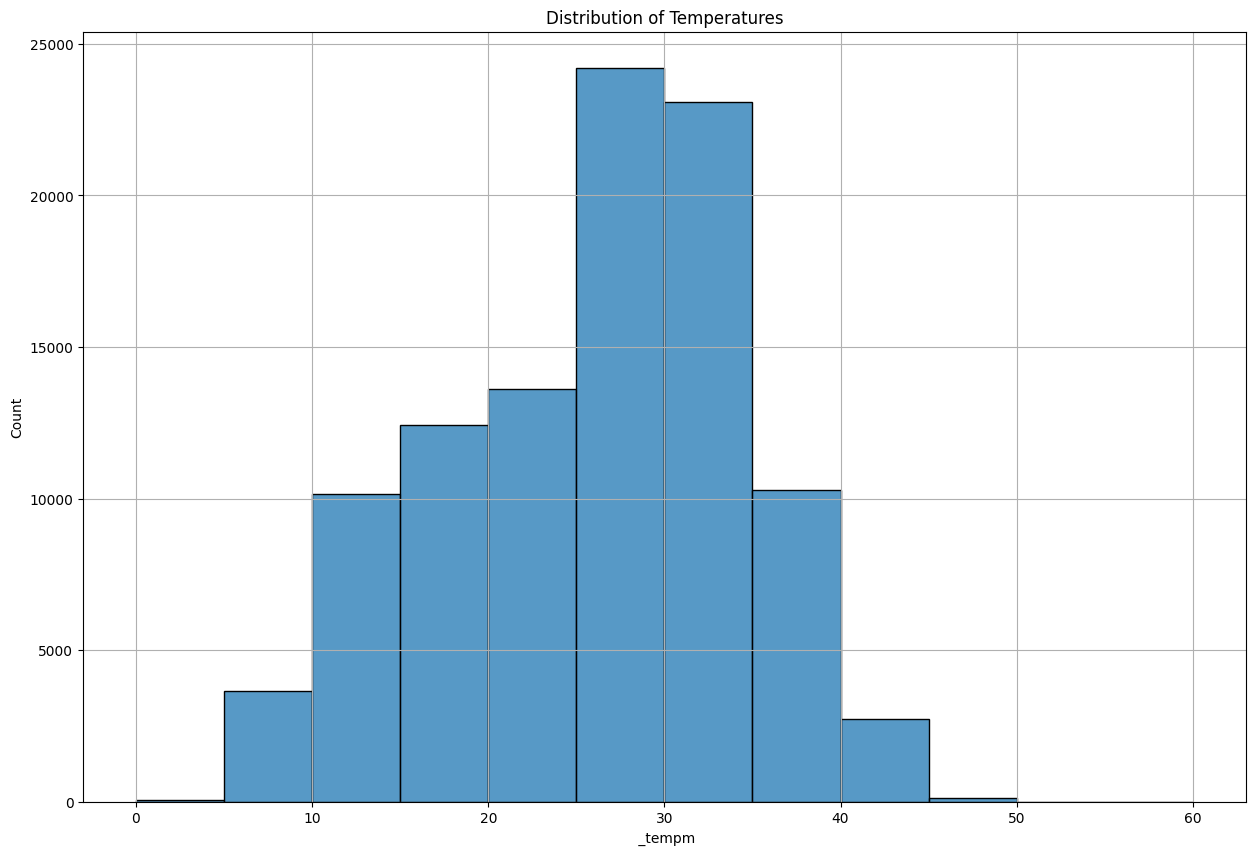

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

**Inference:** Most of the temperature values lies between 25 to 30 degree, no temperature below 5 degree, no temperature above 50 degree.

Making datetime as index, since this is a temporal dataset

In [ ]:
df.index = pd.to_datetime(df.datetime_utc)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


**Inference:** Now the index is in actual date field

Retrieving the required columns

In [ ]:
reqCols = [' _dewptm',' _fog',' _hail',' _hum',' _rain',' _snow',' _tempm',' _thunder',' _tornado']
df = df[reqCols]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


**Inference:** Dropped the unwanted columns, retrived the most important 9 cols.

Checking Null Values

In [ ]:
df.isna().sum()

 _dewptm     621
 _fog          0
 _hail         0
 _hum        757
 _rain         0
 _snow         0
 _tempm      673
 _thunder      0
 _tornado      0
dtype: int64

**Inference:** There is some null values in some columns.

In [ ]:
df = df.fillna(method='ffill')
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [ ]:
df.isna().sum()

 _dewptm     0
 _fog        0
 _hail       0
 _hum        0
 _rain       0
 _snow       0
 _tempm      0
 _thunder    0
 _tornado    0
dtype: int64

**Inference:** Now the null values are rectified.

Resampling the dataset to daily data from hourly data

In [ ]:
dfFinal = df.resample('D').mean()
dfFinal.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


**Inference:** We no longer have hours, all values are resampled based on days.

In [ ]:
dfFinal.isna().sum()

 _dewptm     0
 _fog        0
 _hail       0
 _hum        0
 _rain       0
 _snow       0
 _tempm      0
 _thunder    0
 _tornado    0
dtype: int64

**Inference:** Because of some missing values in date, we need to rectify the null values.

In [ ]:
dfFinal = dfFinal.fillna(method='ffill')
dfFinal.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


Transforming the dataset into a good format required for LSTM Model

In [ ]:
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(dfFinal)

In [ ]:
sequenceLength = 10 # Will take all the variables from previous 10 days and it will maintain sequence and will predict the 11th day
numFeatures = len(dfFinal.columns)

In [ ]:
sequences = []
labels = []
for i in range(len(scaledData) - sequenceLength):
    seq = scaledData[i:i+sequenceLength]
    label = scaledData[i+sequenceLength][6]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)


In [ ]:
sequences = np.array(sequences)
labels = np.array(labels)


train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (5976, 10, 9)
Train Y shape: (5976,)
Test X shape: (1494, 10, 9)
Test Y shape: (1494,)


**Inference:** In training we have 10 sequence and 9 variables and we have 1 value as prediction. Same for testing.

# **Building LSTM Model**

In [ ]:
model = Sequential()

model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           70656     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

Training the Model

In [ ]:
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
)

Epoch 1/100
75/75 [==============================] - 11s 59ms/step - loss: 0.0276 - val_loss: 0.0046
Epoch 2/100
75/75 [==============================] - 4s 51ms/step - loss: 0.0094 - val_loss: 0.0045
Epoch 3/100
75/75 [==============================] - 4s 48ms/step - loss: 0.0094 - val_loss: 0.0044
Epoch 4/100
75/75 [==============================] - 3s 41ms/step - loss: 0.0087 - val_loss: 0.0041
Epoch 5/100
75/75 [==============================] - 3s 40ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 6/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0074 - val_loss: 0.0042
Epoch 7/100
75/75 [==============================] - 3s 41ms/step - loss: 0.0076 - val_loss: 0.0039
Epoch 8/100
75/75 [==============================] - 3s 40ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 9/100
75/75 [==============================] - 3s 40ms/step - loss: 0.0069 - val_loss: 0.0036
Epoch 10/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0069 - val_loss: 0.003

Evaluating the Model

In [ ]:
test_loss = model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

47/47 [==============================] - 0s 10ms/step - loss: 0.0019
Test Loss: 0.0019377651624381542
